In [ ]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules

Segments to look out for that had no axon
864691135012395766 # one of the split segments files not there (split index = 1)
864691135865584005 #soma soma merger
864691136451113215 #it was an inhibitory neuron (part of split)

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-06-22 18:53:16,755 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 18:53:16,757 - settings - Setting database.user to celiib
INFO - 2021-06-22 18:53:16,759 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 18:53:16,760 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 18:53:16,761 - settings - Setting database.user to celiib
INFO - 2021-06-22 18:53:16,762 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 18:53:16,766 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-06-22 18:53:17,316 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 18:53:17,372 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 18:53:17,373 - settings - Setting database.user to celiib
INFO - 2021-06-22 18:53:17,374 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 18:53:17,376 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 18:53:17,983 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 18:53:18,052 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 18:53:18,053 - settings - Setting database.user to celiib
INFO - 2021-06-22 18:53:18,054 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 18:53:18,055 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 18:53:18,056 - settings - Setting database.user to celiib
INFO - 2021-06-22 18:53:18,056 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-06-22 18:53:18,936 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 18:53:18,938 - settings - Setting database.user to celiib
INFO - 2021-06-22 18:53:18,939 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 18:53:18,941 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 18:53:19,659 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Getting the Results of the Validation

In [38]:
minnie.AutoProofreadValidationScore6()

INFO - 2021-06-22 22:22:34,399 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 22:22:34,400 - settings - Setting database.user to celiib
INFO - 2021-06-22 22:22:34,401 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 22:22:34,402 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 22:22:34,403 - settings - Setting database.user to celiib
INFO - 2021-06-22 22:22:34,404 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 22:22:34,408 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 22:22:35,916 - settings - Setting enable_python_native_blobs to True


ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds)
88.00,189149,864691135855890478,0.08,0,=BLOB=,369.84999619148164,=BLOB=,=BLOB=,7,160,11,0,0.3888888888888889,1.0,0.56,5281,7,39,3,0.9926691729323308,0.9994322482967449,0.9960392304790645,435.59
88.00,223037,864691136227167569,0.08,0,=BLOB=,63.375728490237755,=BLOB=,=BLOB=,0,450,0,0,nan,nan,nan,1,3410,3859,0,0.00025906735751295336,1.0,0.000518000518000518,512.22
88.00,225498,864691135753932237,0.08,0,=BLOB=,185.8554437449504,=BLOB=,=BLOB=,6,77,0,5,1.0,0.5454545454545454,0.7058823529411764,1124,0,0,9,1.0,0.9920564872021183,0.9960124058484714,103.53
88.00,230236,864691135609687047,0.08,0,=BLOB=,1400.0527722290963,=BLOB=,=BLOB=,31,552,9,19,0.775,0.62,0.6888888888888889,1961,22,1,1,0.9994903160040775,0.9994903160040775,0.9994903160040775,396.06
88.00,236197,864691136903144370,0.08,0,=BLOB=,40.753447012345966,=BLOB=,=BLOB=,0,975,0,5,nan,0.0,nan,2750,2329,7,48,0.9974610083424011,0.9828448892065761,0.99009900990099,507.11
88.00,258307,864691135293126156,0.08,0,=BLOB=,1095.334412475715,=BLOB=,=BLOB=,43,335,17,27,0.7166666666666667,0.6142857142857143,0.6615384615384615,2984,7,25,19,0.9916915918909937,0.9936729936729937,0.9926813040585496,382.22
88.00,262773,864691136023889209,0.08,0,=BLOB=,183.47810007157142,=BLOB=,=BLOB=,9,48,2,0,0.8181818181818182,1.0,0.9,724,0,2,10,0.9972451790633609,0.9863760217983651,0.9917808219178083,95.45
88.00,264870,864691136951664863,0.08,0,=BLOB=,1031.1101255879166,=BLOB=,=BLOB=,31,421,3,1,0.9117647058823529,0.96875,0.9393939393939394,2008,25,4,33,0.9980119284294234,0.9838314551690348,0.9908709597828769,419.38
88.00,269247,864691135584074360,0.08,0,=BLOB=,1743.8423406603513,=BLOB=,=BLOB=,163,111,0,10,1.0,0.9421965317919075,0.9702380952380953,807,0,7,64,0.9914004914004914,0.9265212399540758,0.9578635014836795,271.88
88.00,269380,864691135974639471,0.08,0,=BLOB=,451.5681577333852,=BLOB=,=BLOB=,27,255,6,11,0.8181818181818182,0.7105263157894737,0.7605633802816901,1863,4,8,3,0.9957242116515232,0.9983922829581994,0.9970564624029972,297.08


In [6]:
training_set = minnie.AutoProofreadValidationSegment.proj(old_segment_id="segment_id").fetch("old_segment_id")
training_set      

array([864691134988386682, 864691135113167769, 864691135212632448,
       864691135212690816, 864691135233108569, 864691135272164113,
       864691135348272855, 864691135382947307, 864691135393964789,
       864691135407289801, 864691135491233631, 864691135501578306,
       864691135510455760, 864691135564655959, 864691135589906955,
       864691135589907979, 864691135645592260, 864691135699269154,
       864691135735426708, 864691135736387732, 864691135737374100,
       864691135740225387, 864691135748568361, 864691135748575017,
       864691135771629819, 864691135785277636, 864691135865518469,
       864691135866394390, 864691135925564174, 864691135945413668,
       864691135974454383, 864691135974454639, 864691135974454895,
       864691136003930314, 864691136008425132, 864691136008573614,
       864691136056340440, 864691136056391384, 864691136099807093,
       864691136105484249, 864691136105491417, 864691136105493209,
       864691136105498585, 864691136134446219, 864691136175008

In [39]:
validation_table_pd = vu.current_validation_df()

INFO - 2021-06-22 22:22:48,316 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-22 22:22:48,317 - settings - Setting database.user to celiib
INFO - 2021-06-22 22:22:48,318 - settings - Setting database.password to newceliipass
INFO - 2021-06-22 22:22:48,322 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-22 22:22:49,788 - settings - Setting enable_python_native_blobs to True


# On Training Set

Segment Id = 864691134988386682
Postsyn counts:
TP:202000
TN:1108
FP:323
FN:1496
Presyn counts:
TP:1392
TN:9928
FP:270
FN:583


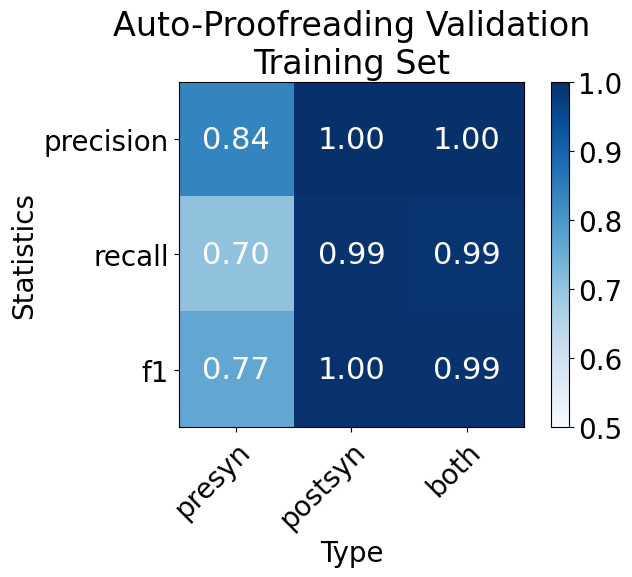

In [40]:
training_df = validation_table_pd[validation_table_pd["old_segment_id"].isin(training_set)]
vu.validation_df_to_score_plot(training_df,
                              title_append = "Training Set")

# With the held out neurons

In [41]:
held_out_df = validation_table_pd[~validation_table_pd["old_segment_id"].isin(training_set)]

Segment Id = 864691134988385914
Postsyn counts:
TP:315645
TN:117130
FP:10556
FN:8388
Presyn counts:
TP:830
TN:16981
FP:260
FN:319


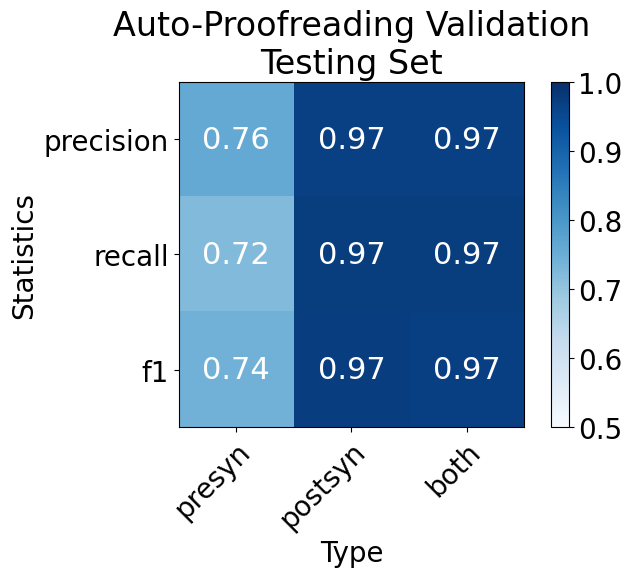

In [42]:
vu.validation_df_to_score_plot(held_out_df,title_append = "Testing Set")

In [43]:
n_somas,n_glia = held_out_df["n_somas"].to_numpy(),held_out_df["n_glia"].to_numpy()

In [44]:
n_somas

array([1, 2, 2, 1, 2, 1, 1, 1, 1, 5, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 1, 4, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1])

In [45]:
n_glia

array([0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [46]:
len(np.where(n_somas>1)[0])/len(n_somas)

0.3333333333333333

In [47]:
np.sum(n_glia)

4

# Overall Accuracy

Segment Id = 864691134988385914
Postsyn counts:
TP:517645
TN:118238
FP:10879
FN:9884
Presyn counts:
TP:2222
TN:26909
FP:530
FN:902


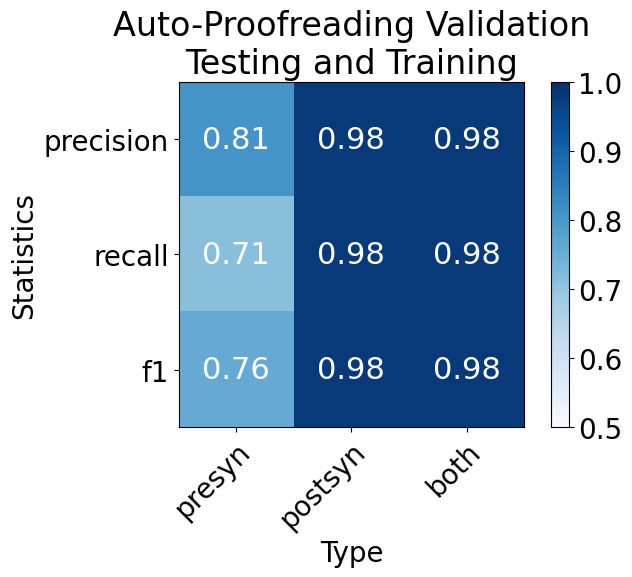

In [48]:
vu.validation_df_to_score_plot(validation_table_pd,
                              title_append = "Testing and Training")

# on the training set

In [ ]:
curr_table2 = ((minnie.AutoProofreadValidationScore5() * minnie.AutoProofreadValidationSegmentMap4())
 & (dj.U("old_segment_id") & minnie.AutoProofreadValidationBorderNeurons().proj(old_segment_id="segment_id")))
curr_table2

In [ ]:
(curr_table2 & dict(segment_id=864691136378815445)).fetch1("decomposition")

In [ ]:
curr_table = ((minnie.AutoProofreadValidationScore4() * minnie.AutoProofreadValidationSegmentMap4())
 & (dj.U("old_segment_id") & minnie.AutoProofreadValidationBorderNeurons().proj(old_segment_id="segment_id")))
curr_table

In [ ]:
seg_ids,pre_recall_v4 = curr_table.fetch("segment_id","pre_recall")
pre_recall_v5 = curr_table2.fetch("pre_recall")

In [ ]:
recall_diff = (pre_recall_v4 - pre_recall_v5)
indices_recall_diff = np.where(recall_diff > 0)[0]
print(recall_diff[indices_recall_diff])
print(seg_ids[indices_recall_diff])

In [ ]:
curr_table2 & dict(segment_id=864691135415666362)

In [ ]:
total_validation_df = vu.table_to_score_plot(curr_table,
                       return_validation_df=True)